In [134]:
import torch
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# ODE Systems and Solvers

The goal of this notebook is to provide a collection of simple linear ODE systems and ODE solvers.

In [190]:
# simple matrix - vector multiply
# first, identity matrix 10x10
F = torch.eye(10)
# make elements on the diagonal negative
F = -0.5*F
x = 20*torch.rand(10)

In [191]:
torch.matmul(F,x)

tensor([-5.7792, -7.1376, -9.8825, -3.3235, -4.3754, -9.5700, -6.8968, -2.1999,
        -4.4309, -6.5444])

## Generic linear ODE class

In [192]:
class GenericModel(object):
    def __init__(self, F):
        self.F = F
    def __call__(self, x, dt):
        # this is dxdt
        return torch.matmul(F, x)*dt

In [193]:
model = GenericModel(F)

In [196]:
traj = []
x = 10*torch.rand(10)
# the smaller the dt, the smoother the trajectory
dt = 0.01
# each step is 0.01s, 1000 steps --> 10 second of trajectory
for t in range(1000):
    dxdt = model(x, dt)
    # model gives you dx*dt (step). x(old) + step -> new position
    x = x + dxdt
    traj.append(x)  

We can then plot the evolution in time of the 10 variables in the tensor of size (10) according to the generic linear ODE:

$$\dot{x} = F x$$

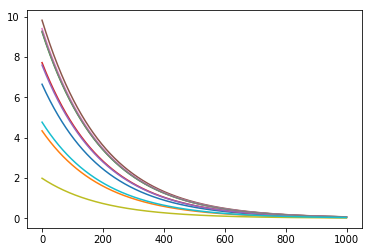

In [197]:
# sanity check: the elements in the diagonal of F are all negative -> each variable is decreased each step, eventually converging to 0
for i in range(10):
    plt.plot([el[i] for el in traj])

## Solvers:

### Goal:

We are trying to approximate the above ODE. One method (which is the same that was used to obtain the above plot) is the Euler's method

### Euler

In [200]:
def eulerSolver(t0, x0, dt, model):
    dxdt = model(x0, dt)
    x0 = x0 + dxdt
    return x0

In [201]:
traj = []
x0 = 10*torch.rand(10)
dt = 0.01
for t in range(1000):
    x_new = eulerSolver(0, x0, dt, model)
    traj.append(x_new)
    x0 = x_new

As expected, this is similar (different random initialization of x0 but oterwise same exponentially decaying behaviour)

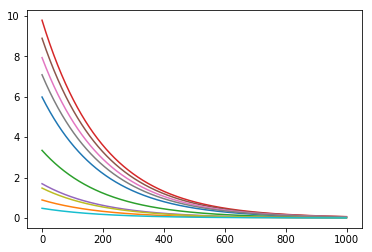

In [202]:
for i in range(10):
    plt.plot([el[i] for el in traj])

### Runge-Kutta 4

In [250]:
def rk4 (t0, x0, dt, model):   
    f1 = model(x0, dt)
    
    c2 = dt * f1 / 2.0
    f2 = model(x0 + c2, dt/2.0)
    
    c3 = dt * f2 / 2.0
    f3 = model(x0 + c3, dt/2.0)
    
    c4 = dt * f3
    f4 = model(x0 + c4, dt)
    
    x0 = x0 + (f1 + 2.0 * f2 + 2.0 * f3 + f4) / 6.0
    return x0

In [252]:
traj = []
x0 = 10*torch.rand(10)
dt = 0.01
for t in range(1000):
    x_new = rk4(0, x0, dt, model)
    traj.append(x_new)
    x0 = x_new

Cool, this works too

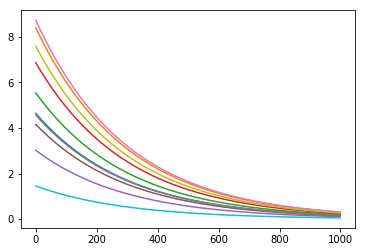

In [254]:
for i in range(10):
    plt.plot([el[i] for el in traj])